In [8]:
import pandas as pd


In [9]:
df=pd.read_csv('instagram_reach.csv')
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [10]:
df.isnull().sum()


Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [12]:
print(df.columns)


Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')


In [13]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Unnamed: 0', 'S.No', 'Followers', 'Likes'], dtype='object')
Categorical Columns: Index(['USERNAME', 'Caption', 'Hashtags', 'Time since posted'], dtype='object')


In [14]:
df[categorical_columns].describe()


,USERNAME,Caption,Hashtags,Time since posted
count,100,94,100,100
unique,95,94,98,11
top,mikequindazzi,Who are #DataScientist and what do they do? >>...,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours
freq,4,1,2,57


In [15]:
df['Time since posted'].value_counts


<bound method IndexOpsMixin.value_counts of 0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 100, dtype: object>

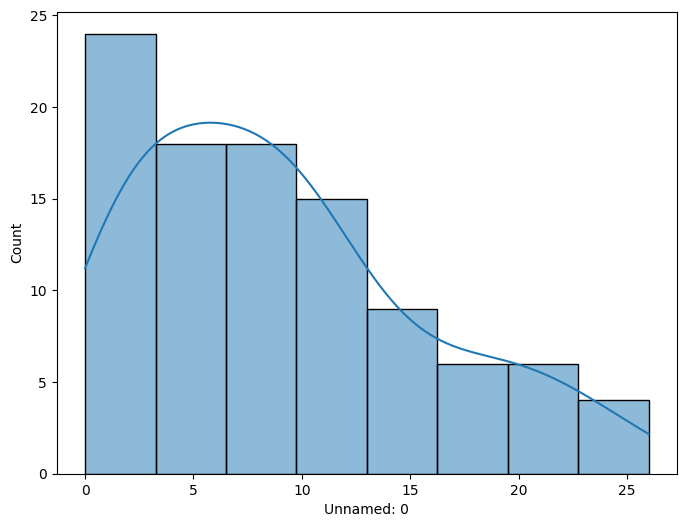

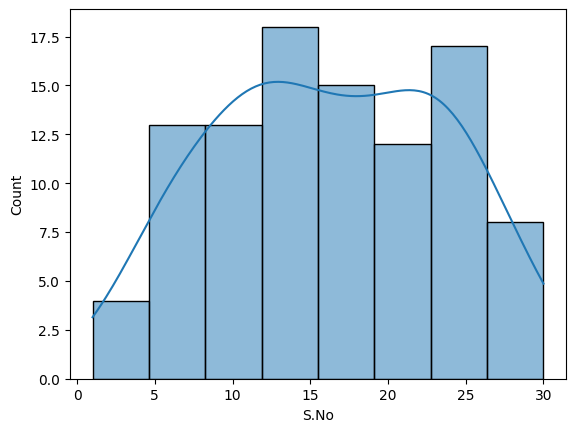

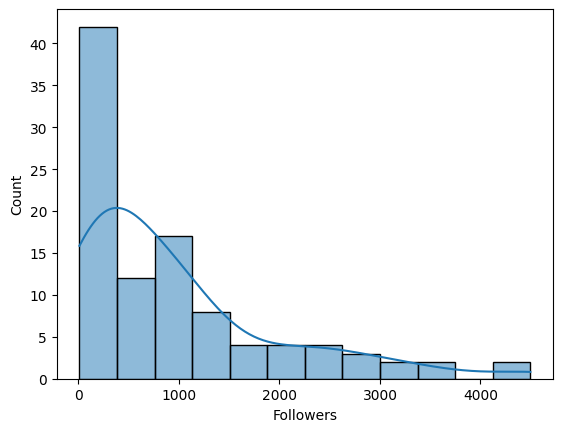

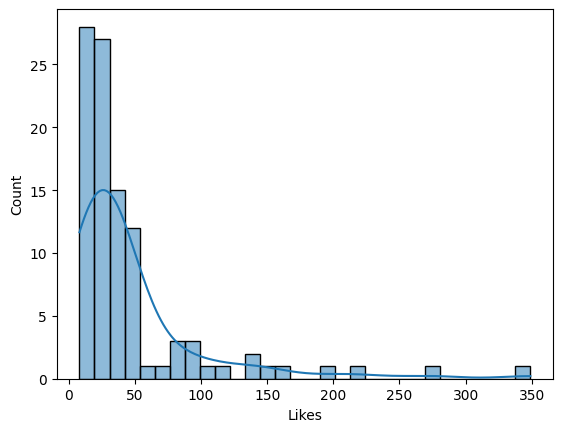

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

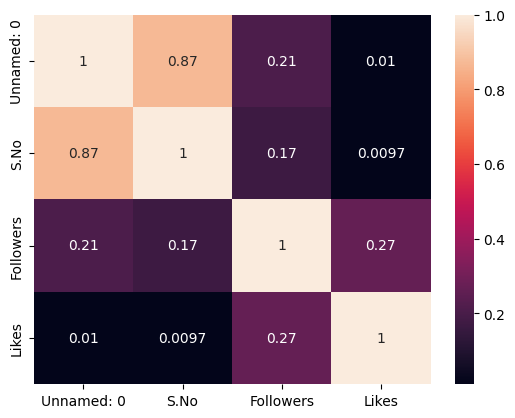

In [17]:
sns.heatmap(df[numerical_columns].corr(),annot=True)


In [18]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [19]:
df['Time since posted'] = df['Time since posted'].apply(lambda x: int(x.split(' ')[0]))


In [20]:
df['Time since posted']

0     11
1      2
2      2
3      3
4      3
      ..
95     3
96     3
97     3
98     3
99     3
Name: Time since posted, Length: 100, dtype: int64

In [21]:
df.head()


,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [22]:
X = df[['USERNAME', 'Caption', 'Followers', 'Hashtags']]
y_like = df['Likes']
y_time = df['Time since posted']

In [23]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_like_train, Y_like_test, Y_time_train, Y_time_test = train_test_split(X,y_like,y_time,random_state=21,test_size=0.2)

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()


for col in X_train.columns:
    X_train_encoded[col] = label_encoder.fit_transform(X_train[col])
    

for col in X_test.columns:
    X_test_encoded[col] = label_encoder.fit_transform(X_test[col])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
import numpy as np

lr = LinearRegression()
lr.fit(X_train_encoded, Y_like_train)
likes_predictions = lr.predict(X_test_encoded)

mse = mean_squared_error(Y_like_test, likes_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_like_test, likes_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 6809.062884267749
Root Mean Squared Error (RMSE): 82.5170460224295
R-squared (R²): -0.9056777657870461
